In [1]:
import sys
sys.path.append('..')

from score_drives import score_drives

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
df = score_drives(2009, 2018, exclude_playoffs=True, data_level_up=True)

In [22]:
df.head()

,away_final_score,away_team,defensive_team,drive_time,end_quarter,end_time,first_play_desc,game_id,home_final_score,home_score_diff_last_quarter,...,field_position_points,drive_score,offensive_win,defensive_win,tie,offense_home,defense_home,nfl_avg_score,adj_offensive_score,adj_defensive_score
0,10,TEN,TEN,1.733333,1,13:16,R.Bironas kicks 67 yards from TEN 30 to PIT 3....,2009091000,13,0,...,0.000000,-2.231989,1,0,0,True,False,2.231989,-2.350130,-2.320163
1,10,TEN,PIT,1.866667,1,11:24,(13:16) C.Johnson up the middle to TEN 2 for n...,2009091000,13,0,...,-0.558144,-1.507663,0,1,0,False,True,0.949518,-1.245928,-1.598065
2,10,TEN,TEN,3.066667,1,08:20,(11:24) B.Roethlisberger pass short right to M...,2009091000,13,0,...,0.000000,-2.450156,1,0,0,True,False,2.450156,-2.568296,-2.538330
3,10,TEN,PIT,1.600000,1,06:44,(8:20) C.Johnson right end to TEN 43 for 32 ya...,2009091000,13,0,...,0.270044,1.599338,0,1,0,False,True,1.421590,1.861072,1.508935
4,10,TEN,TEN,1.916667,1,04:49,(6:44) R.Mendenhall up the middle to PIT 28 fo...,2009091000,13,0,...,-0.270044,-1.807345,1,0,0,True,False,1.537301,-1.925485,-1.895519


In [23]:
aggs = df.groupby(['season', 'offensive_team'], as_index=False).agg(
    {'yards_gained': 'sum', 'n_plays': 'sum', 'is_touchdown': 'sum', 
     'is_score': 'sum', 'drive_id': 'nunique'}
)
aggs = aggs.rename(
    {'is_touchdown': 'n_tds', 'is_score': 'n_scores', 
     'drive_id': 'n_drives'}, axis=1
)

aggs.head()

,season,offensive_team,yards_gained,n_plays,n_tds,n_scores,n_drives
0,2009,ARI,5494,1399,44,62,200
1,2009,ATL,5450,1428,41,60,173
2,2009,BAL,5622,1402,44,65,185
3,2009,BUF,4377,1310,23,51,189
4,2009,CAR,5287,1396,34,56,194


In [24]:
aggs['yards_per_td'] = aggs['yards_gained'] / aggs['n_tds']
aggs['yards_per_score'] = aggs['yards_gained'] / aggs['n_scores']
aggs['yards_per_play'] = aggs['yards_gained'] / aggs['n_plays']
aggs['yards_per_drive'] = aggs['yards_gained'] / aggs['n_drives']

aggs.head()

,season,offensive_team,yards_gained,n_plays,n_tds,n_scores,n_drives,yards_per_td,yards_per_score,yards_per_play,yards_per_drive
0,2009,ARI,5494,1399,44,62,200,124.863636,88.612903,3.927091,27.470000
1,2009,ATL,5450,1428,41,60,173,132.926829,90.833333,3.816527,31.502890
2,2009,BAL,5622,1402,44,65,185,127.772727,86.492308,4.009986,30.389189
3,2009,BUF,4377,1310,23,51,189,190.304348,85.823529,3.341221,23.158730
4,2009,CAR,5287,1396,34,56,194,155.500000,94.410714,3.787249,27.252577


In [25]:
aggs.sort_values('n_tds', ascending=False).head(10)

,season,offensive_team,yards_gained,n_plays,n_tds,n_scores,n_drives,yards_per_td,yards_per_score,yards_per_play,yards_per_drive
137,2013,DEN,7317,1553,72,97,203,101.625000,75.432990,4.711526,36.044335
303,2018,KC,6805,1419,66,90,172,103.106061,75.611111,4.795631,39.563953
75,2011,GB,6482,1427,64,88,184,101.281250,73.659091,4.542397,35.228261
85,2011,NO,7459,1513,62,90,175,120.306452,82.877778,4.929941,42.622857
116,2012,NE,6853,1568,61,90,190,112.344262,76.144444,4.370536,36.068421
309,2018,NO,6065,1401,59,87,169,102.796610,69.712644,4.329051,35.887574
225,2016,ATL,6648,1386,58,92,175,114.620690,72.260870,4.796537,37.988571
52,2010,NE,5815,1351,58,80,168,100.258621,72.687500,4.304219,34.613095
84,2011,NE,6829,1473,57,85,182,119.807018,80.341176,4.636117,37.521978
21,2009,NO,6461,1421,56,78,187,115.375000,82.833333,4.546798,34.550802


In [26]:
aggs.describe([.05, .1, .25, .75, .9, .95, .99])

,season,yards_gained,n_plays,n_tds,n_scores,n_drives,yards_per_td,yards_per_score,yards_per_play,yards_per_drive
count,320.00000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000
mean,2013.50000,5507.762500,1415.140625,37.378125,63.262500,187.303125,153.918301,88.467445,3.888521,29.525622
std,2.87678,601.910073,56.604348,9.399401,11.091801,9.954378,29.906098,10.017789,0.360643,3.874978
min,2009.00000,3859.000000,1278.000000,16.000000,35.000000,156.000000,100.258621,64.597403,2.939592,19.909953
5%,2009.00000,4578.700000,1322.900000,23.000000,45.000000,171.950000,117.307922,74.687763,3.322373,23.540875
10%,2009.90000,4778.800000,1342.800000,26.000000,48.900000,175.000000,123.452500,76.811118,3.447618,24.533178
25%,2011.00000,5051.750000,1379.500000,31.000000,55.750000,180.000000,133.000000,82.093657,3.632812,26.677807
50%,2013.50000,5497.000000,1412.500000,37.000000,63.500000,187.000000,150.428571,86.513395,3.865909,29.333846
75%,2016.00000,5935.250000,1454.500000,43.250000,71.000000,195.000000,169.222059,94.333786,4.140173,32.233913
90%,2017.10000,6299.600000,1484.100000,49.000000,77.000000,200.000000,191.156000,101.622745,4.370091,34.583723


In [31]:
(3.89 / 4.8) * 66

53.4875

In [30]:
aggs.corr()

,season,yards_gained,n_plays,n_tds,n_scores,n_drives,yards_per_td,yards_per_score,yards_per_play,yards_per_drive
season,1.000000,0.081922,0.136672,0.082601,0.113765,-0.264530,-0.103424,-0.095017,0.039513,0.175002
yards_gained,0.081922,1.000000,0.569154,0.832867,0.815353,-0.211050,-0.557244,-0.334868,0.935433,0.914718
n_plays,0.136672,0.569154,1.000000,0.392628,0.463891,0.235437,-0.199157,-0.194703,0.243625,0.373290
n_tds,0.082601,0.832867,0.392628,1.000000,0.871022,-0.182920,-0.875791,-0.578158,0.812098,0.764629
n_scores,0.113765,0.815353,0.463891,0.871022,1.000000,-0.169512,-0.725511,-0.802661,0.764449,0.746443
n_drives,-0.264530,-0.211050,0.235437,-0.182920,-0.169512,1.000000,0.128767,0.058407,-0.353370,-0.584586
yards_per_td,-0.103424,-0.557244,-0.199157,-0.875791,-0.725511,0.128767,1.000000,0.663975,-0.573281,-0.512852
yards_per_score,-0.095017,-0.334868,-0.194703,-0.578158,-0.802661,0.058407,0.663975,1.000000,-0.315916,-0.303852
yards_per_play,0.039513,0.935433,0.243625,0.812098,0.764449,-0.353370,-0.573281,-0.315916,1.000000,0.920564
yards_per_drive,0.175002,0.914718,0.373290,0.764629,0.746443,-0.584586,-0.512852,-0.303852,0.920564,1.000000


In [33]:
gaggs = df.groupby(['season', 'offensive_team', 'game_id'], as_index=False).agg(
    {'yards_gained': 'sum', 'n_plays': 'sum', 'is_touchdown': 'sum', 
     'is_score': 'sum', 'drive_id': 'nunique'}
)
gaggs = gaggs.rename(
    {'is_touchdown': 'n_tds', 'is_score': 'n_scores', 
     'drive_id': 'n_drives'}, axis=1
)

gaggs.head()

,season,offensive_team,game_id,yards_gained,n_plays,n_tds,n_scores,n_drives
0,2009,ARI,2009091309,299,99,1,4,14
1,2009,ARI,2009092003,388,89,3,4,11
2,2009,ARI,2009092714,317,97,1,2,13
3,2009,ARI,2009101109,340,81,3,3,12
4,2009,ARI,2009101809,344,100,3,5,13


In [36]:
gaggs['yards_per_td'] = gaggs['yards_gained'] / gaggs['n_tds']
gaggs['yards_per_score'] = gaggs['yards_gained'] / gaggs['n_scores']
gaggs['yards_per_play'] = gaggs['yards_gained'] / gaggs['n_plays']
gaggs['yards_per_drive'] = gaggs['yards_gained'] / gaggs['n_drives']

gaggs.head()

,season,offensive_team,game_id,yards_gained,n_plays,n_tds,n_scores,n_drives,yards_per_td,yards_per_score,yards_per_play,yards_per_drive
0,2009,ARI,2009091309,299,99,1,4,14,299.000000,74.750000,3.020202,21.357143
1,2009,ARI,2009092003,388,89,3,4,11,129.333333,97.000000,4.359551,35.272727
2,2009,ARI,2009092714,317,97,1,2,13,317.000000,158.500000,3.268041,24.384615
3,2009,ARI,2009101109,340,81,3,3,12,113.333333,113.333333,4.197531,28.333333
4,2009,ARI,2009101809,344,100,3,5,13,114.666667,68.800000,3.440000,26.461538


In [56]:
kc = gaggs.loc[(gaggs['offensive_team'] == 'KC') & (gaggs['season'] == 2018)].copy()

kc

,season,offensive_team,game_id,yards_gained,n_plays,n_tds,n_scores,n_drives,yards_per_td,yards_per_score,yards_per_play,yards_per_drive
4848,2018,KC,2018090908,362,81,4,5,11,90.500000,72.400000,4.469136,32.909091
4849,2018,KC,2018091605,447,86,6,6,12,74.500000,74.500000,5.197674,37.250000
4850,2018,KC,2018092305,384,99,5,6,9,76.800000,64.000000,3.878788,42.666667
4851,2018,KC,2018100100,444,102,3,5,10,148.000000,88.800000,4.352941,44.400000
4852,2018,KC,2018100705,424,96,2,5,11,212.000000,84.800000,4.416667,38.545455
4853,2018,KC,2018101412,446,75,4,8,11,111.500000,55.750000,5.946667,40.545455
4854,2018,KC,2018102105,551,88,5,6,9,110.200000,91.833333,6.261364,61.222222
4855,2018,KC,2018102805,340,85,4,5,12,85.000000,68.000000,4.000000,28.333333
4856,2018,KC,2018110403,499,83,5,6,9,99.800000,83.166667,6.012048,55.444444
4857,2018,KC,2018111105,330,79,3,5,11,110.000000,66.000000,4.177215,30.000000


In [42]:
x = np.arange(1, kc.shape[0] + 1)
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

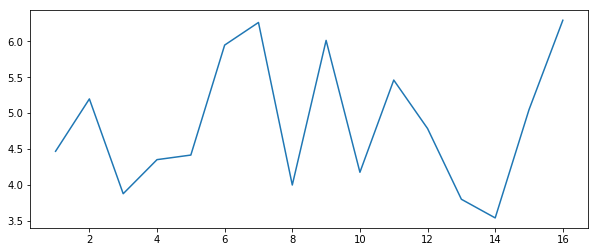

In [49]:
plt.figure(figsize=(10,4))
plt.plot(x, kc['yards_per_play'])
plt.show()

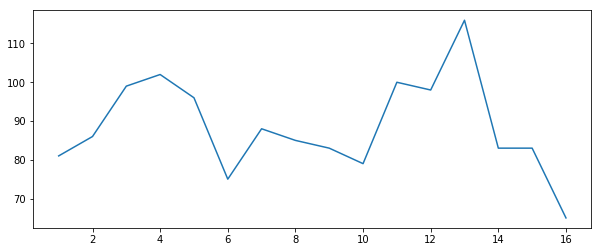

In [54]:
plt.figure(figsize=(10,4))
plt.plot(x, kc['n_plays'])
plt.show()

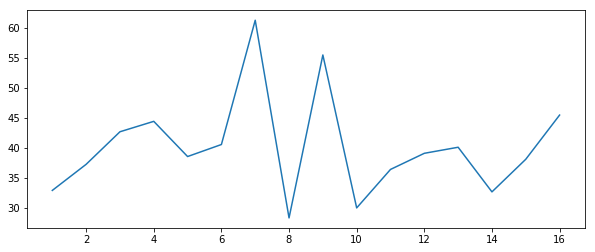

In [53]:
plt.figure(figsize=(10,4))
plt.plot(x, kc['yards_per_drive'])
plt.show()

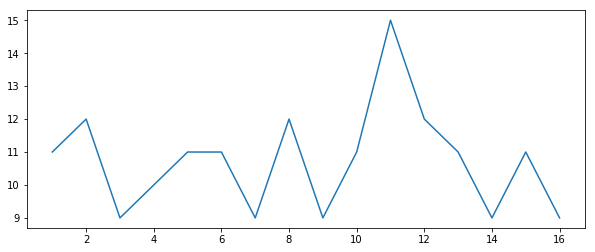

In [55]:
plt.figure(figsize=(10,4))
plt.plot(x, kc['n_drives'])
plt.show()

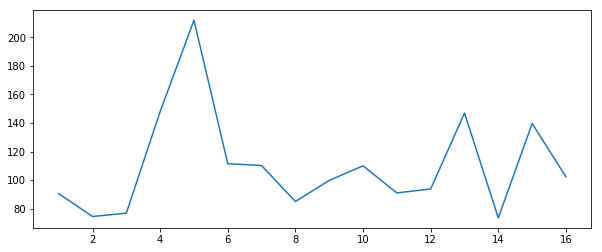

In [50]:
plt.figure(figsize=(10,4))
plt.plot(x, kc['yards_per_td'])
plt.show()

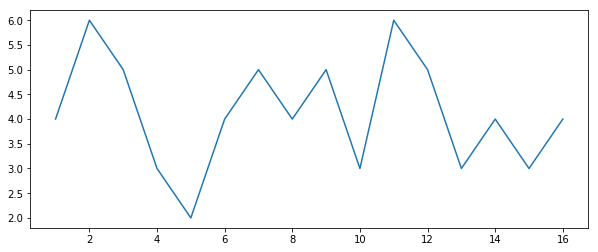

In [51]:
plt.figure(figsize=(10,4))
plt.plot(x, kc['n_tds'])
plt.show()

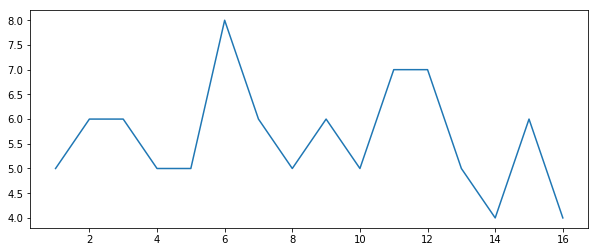

In [52]:
plt.figure(figsize=(10,4))
plt.plot(x, kc['n_scores'])
plt.show()

In [57]:
import json

In [ ]:
json.load(open('data'))